### 1. Install Cuda and Pytorch

### 2. Install Docker

使用docker主要是因为与主机性能区别不大，且配置简单，只需要安装GPU驱动，不用考虑安装Pytorch指定的CUDA,cuDNN等（容器内部已有）；

注意：如果你已经在虚拟机、云GPU、Jetson等平台，则没有必要使用docker。

### 2.1 Setup Docker

#### 2.1.1 Uninstall Old Version
Older versions of Docker went by the names of docker, docker.io, or docker-engine, you might also have installations of containerd or runc. Uninstall any such older versions before attempting to install a new version:

`sudo apt-get remove docker docker-engine docker.io containerd runc`

apt-get might report that you have none of these packages installed.
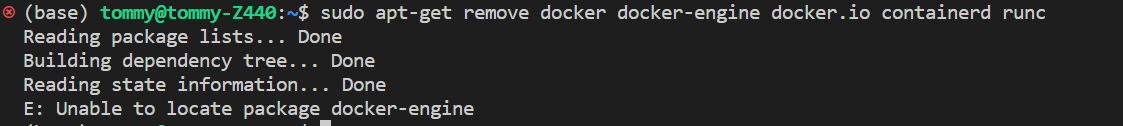

#### 2.1.2 Install using the apt repository
Before you install Docker Engine for the first time on a new host machine, you need to set up the Docker repository. Afterward, you can install and update Docker from the repository.

#### A. Install Docker from the repository 
1. Update the apt package index and install packages to allow apt to use a repository over HTTPS:

`sudo apt-get update`

**Errors:**
`Hit:9 http://us.archive.ubuntu.com/ubuntu jammy InRelease                                                                                                                    
Err:2 file:/var/cudnn-local-repo-ubuntu2204-8.8.0.121  InRelease                                                                                                             
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY 91B24998B66125A0`
`  

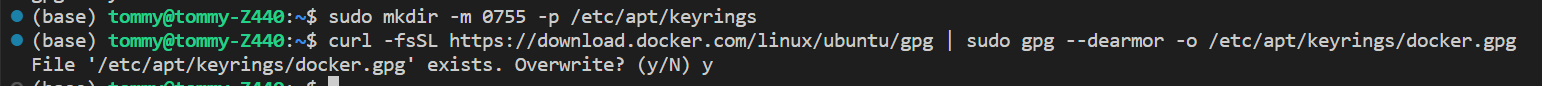



2. install Necessary tools

`sudo apt-get install ca-certificates curl gnupg`

3. Add Docker’s official GPG key:

`sudo mkdir -m 0755 -p /etc/apt/keyrings
curl -fsSL https://download.docker.com/linux/ubuntu/gpg | sudo gpg --dearmor -o /etc/apt/keyrings/docker.gpg
`

4. Use the following command to set up the repository:
`
echo "deb [arch="$(dpkg --print-architecture)" signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu
 "$(. /etc/os-release && echo "$VERSION_CODENAME")" stable" | sudo tee /etc/apt/sources.list.d/docker.list > /dev/null
`

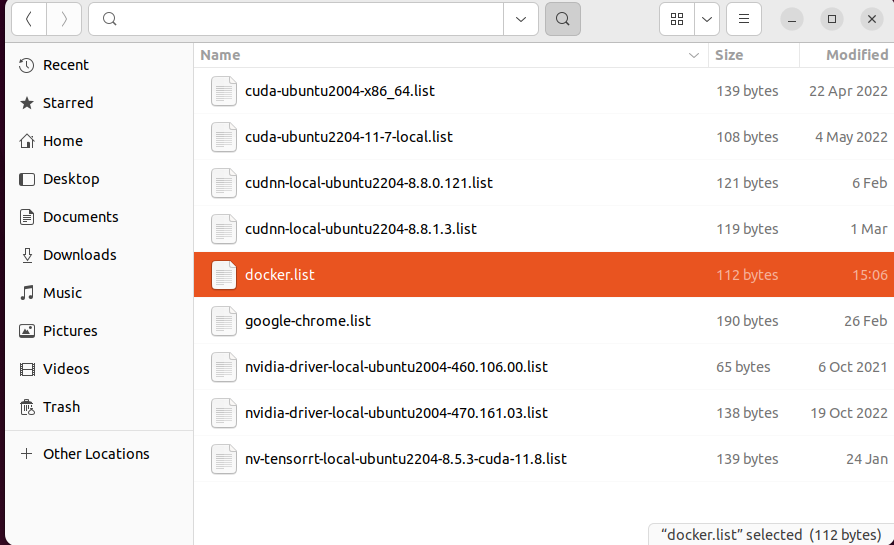

- inside docker.list:
`deb [arch=amd64 signed-by=/etc/apt/keyrings/docker.gpg] https://download.docker.com/linux/ubuntu   jammy stable`

5. Update again after docker's  repository is set:  `sudo apt-get update`

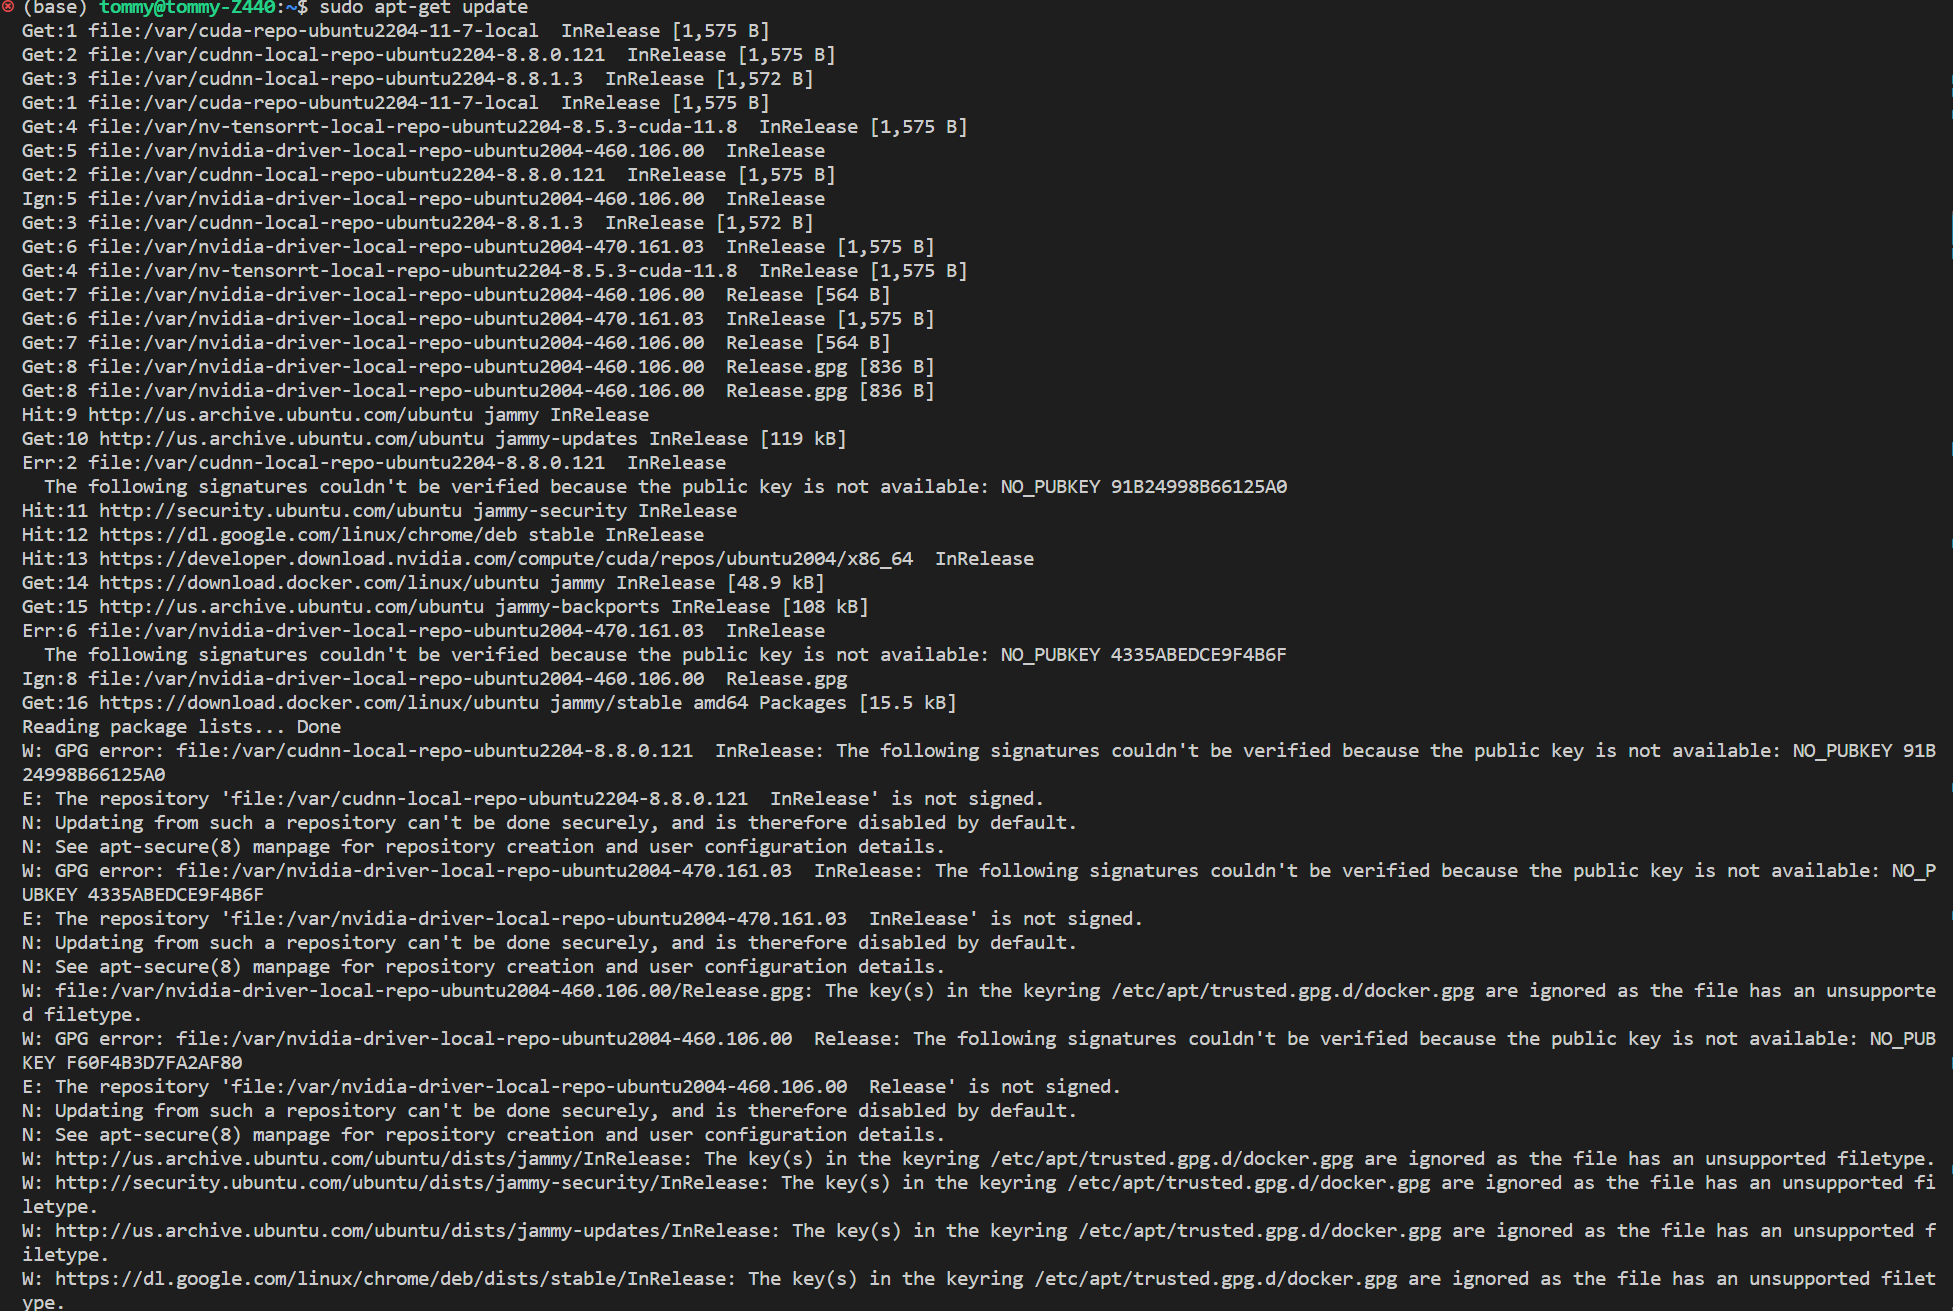

6. install the latest version: `sudo apt-get install docker-ce docker-ce-cli containerd.io docker-buildx-plugin docker-compose-plugin`
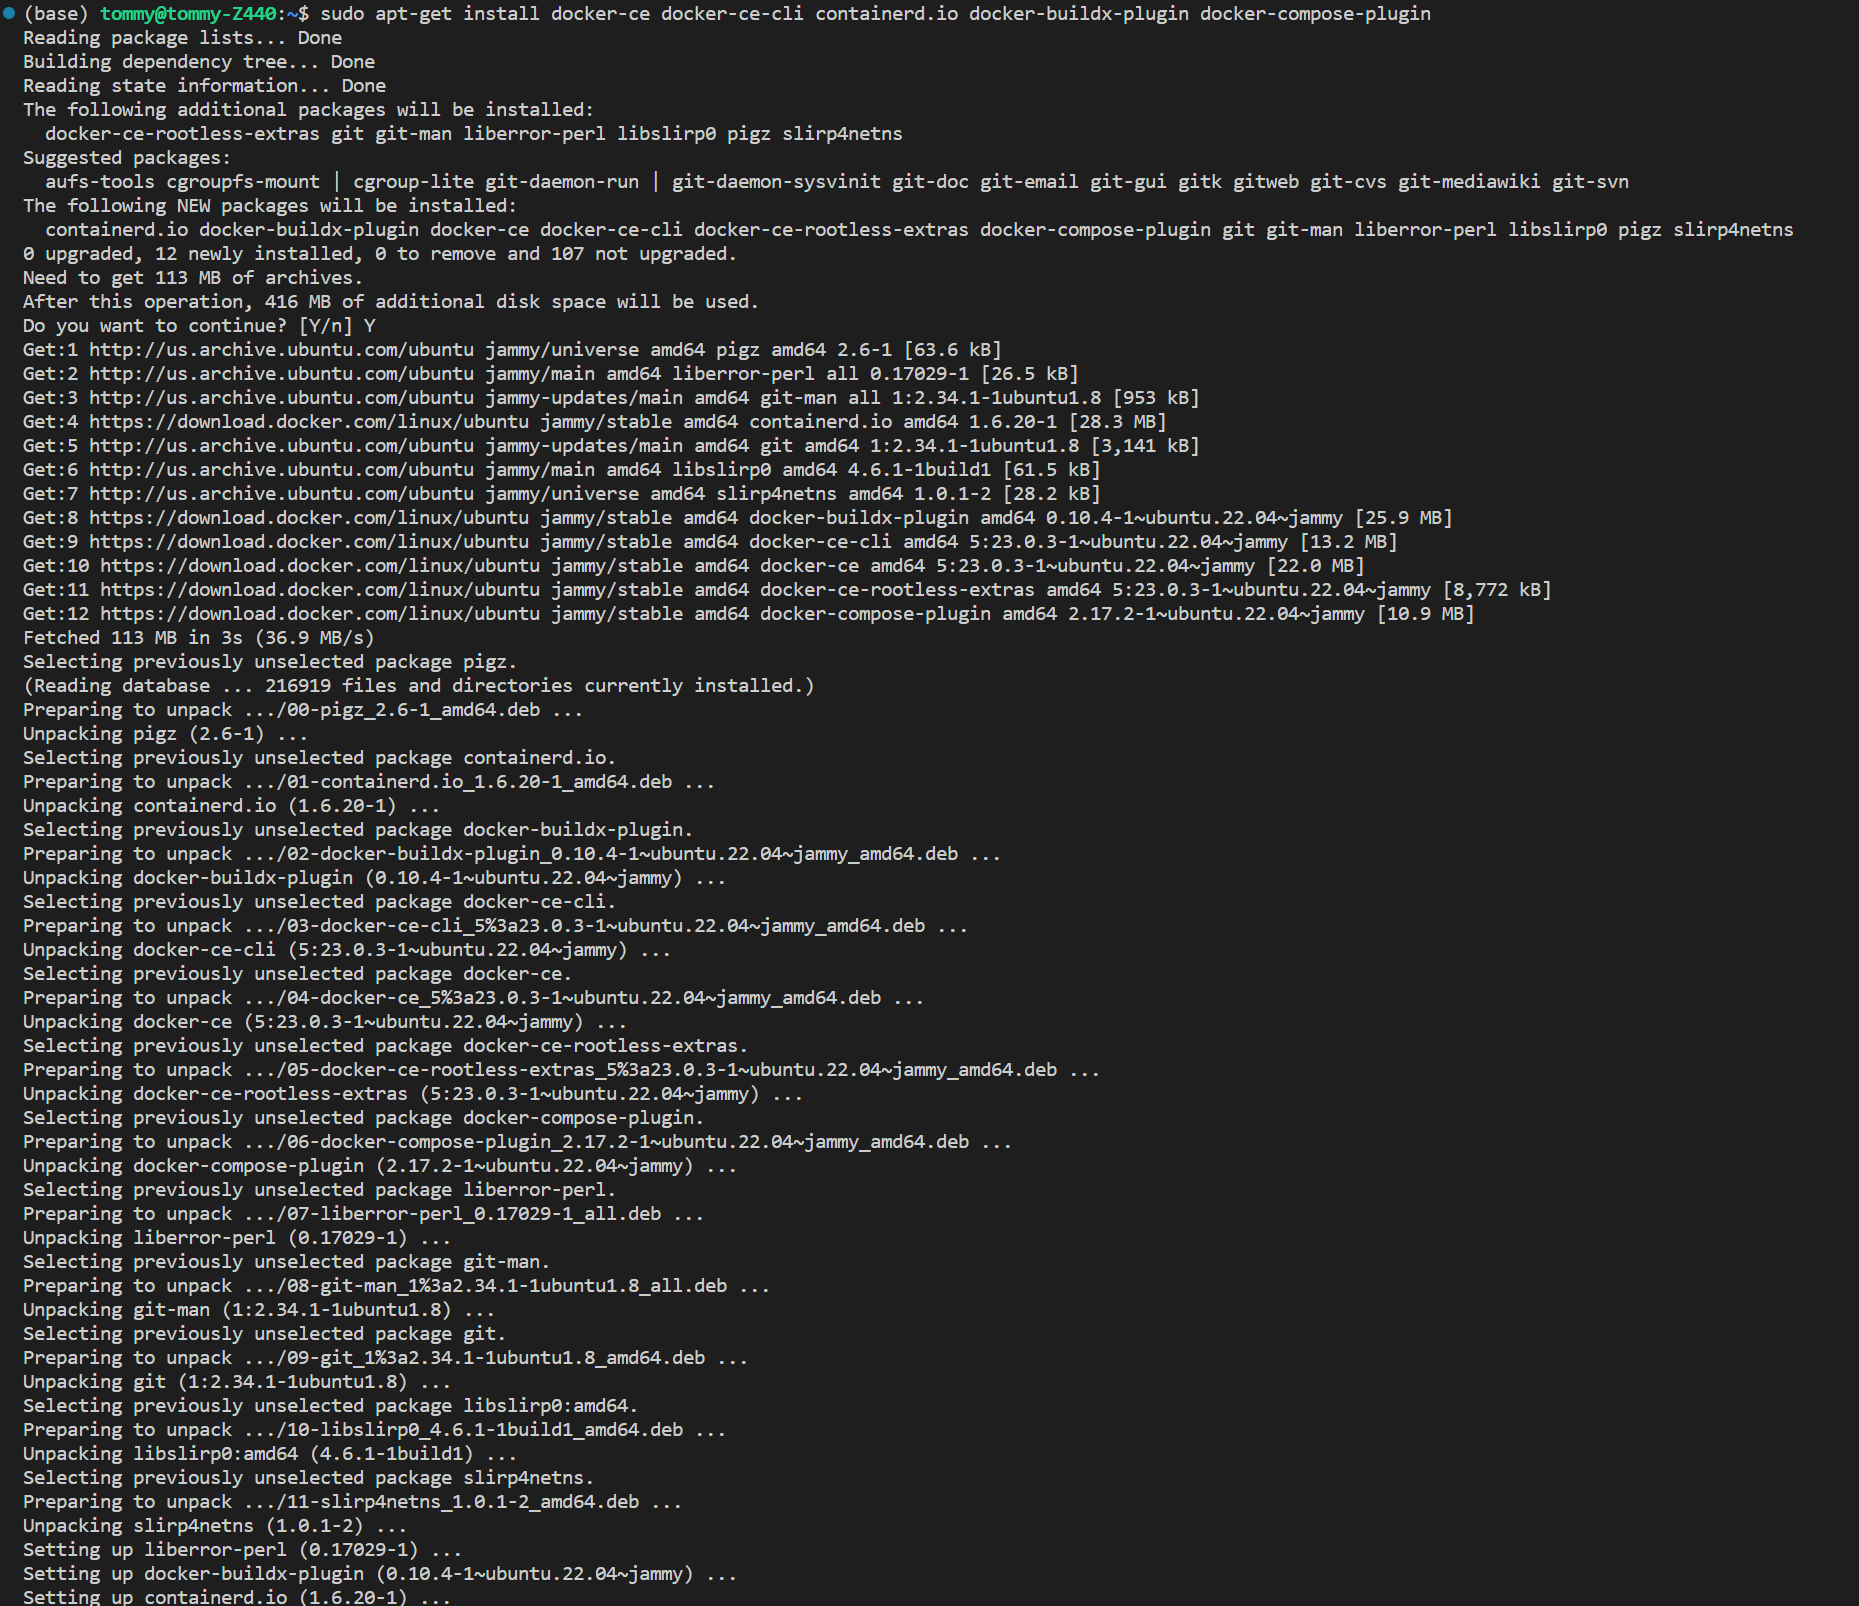

7. Verify Docker installation: `sudo docker run hello-world`
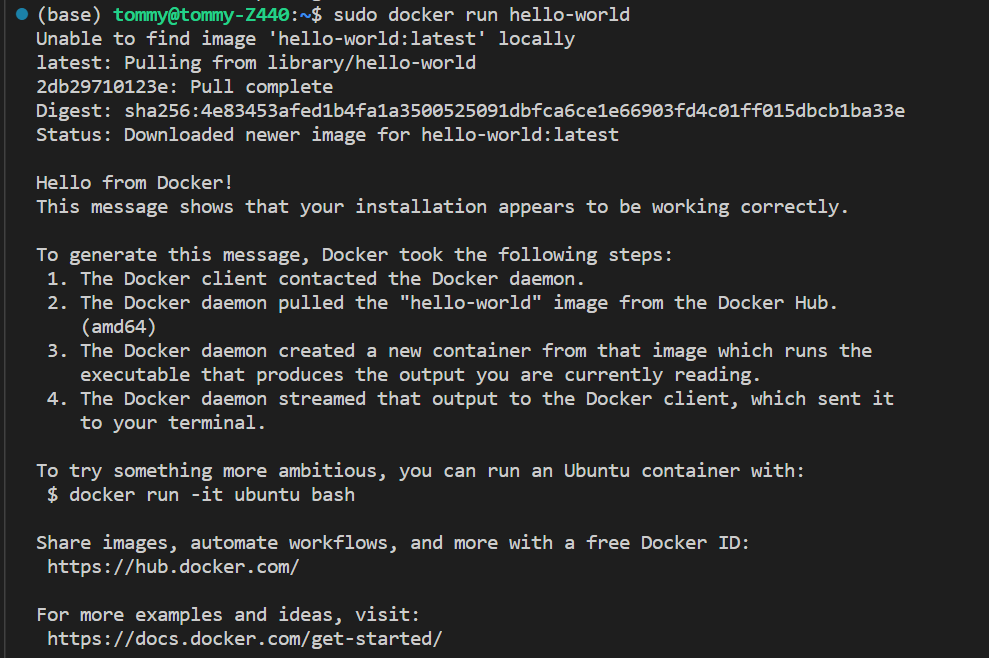

This command downloads a test image and runs it in a container. When the container runs, it prints a confirmation message and exits.

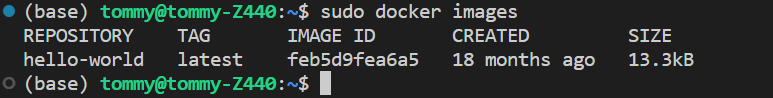

You have now successfully installed and started Docker Engine. The docker user group exists but contains no users, which is why you’re required to use sudo to run Docker commands. Continue to Linux post-install to allow non-privileged users to run Docker commands and for other optional configuration steps.

**Common Commands:**
- run: &emsp;         Create and run a new container from an image
- exec: &emsp; Execute a command in a running container
- ps: &emsp;          List containers
- build: &emsp;       Build an image from a Dockerfile
- pull: &emsp;        Download an image from a registry
- push: &emsp;        Upload an image to a registry
- images: &emsp;      List images
- login: &emsp;       Log in to a registry
- logout: &emsp;      Log out from a registry
- search: &emsp;      Search Docker Hub for images
- version: &emsp;     Show the Docker version information
- info: &emsp;        Display system-wide information
  
`

8. Restart Docker:  `sudo systemctl restart docker`

### B. Install nvidia-container-toolkit
`distribution=$(. /etc/os-release;echo $ID$VERSION_ID) \
      && curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey | sudo gpg --dearmor -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg \
      && curl -s -L https://nvidia.github.io/libnvidia-container/$distribution/libnvidia-container.list | \
            sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' | \
            sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list
`

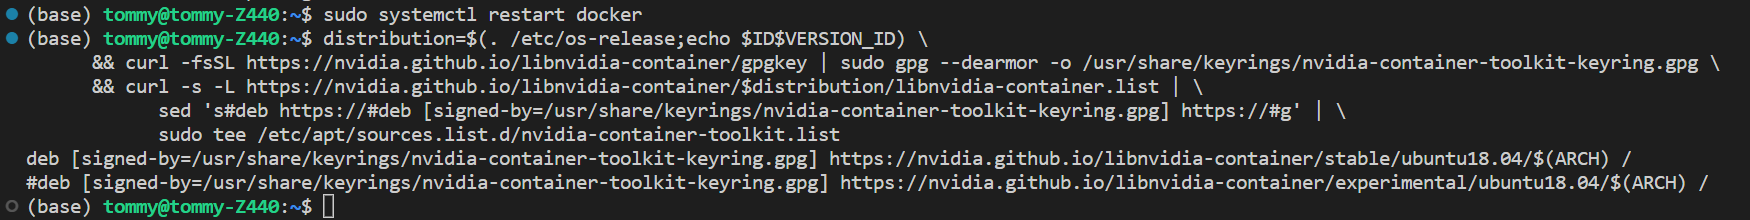

`sudo apt-get update`

`sudo apt-get install -y nvidia-container-toolkit`
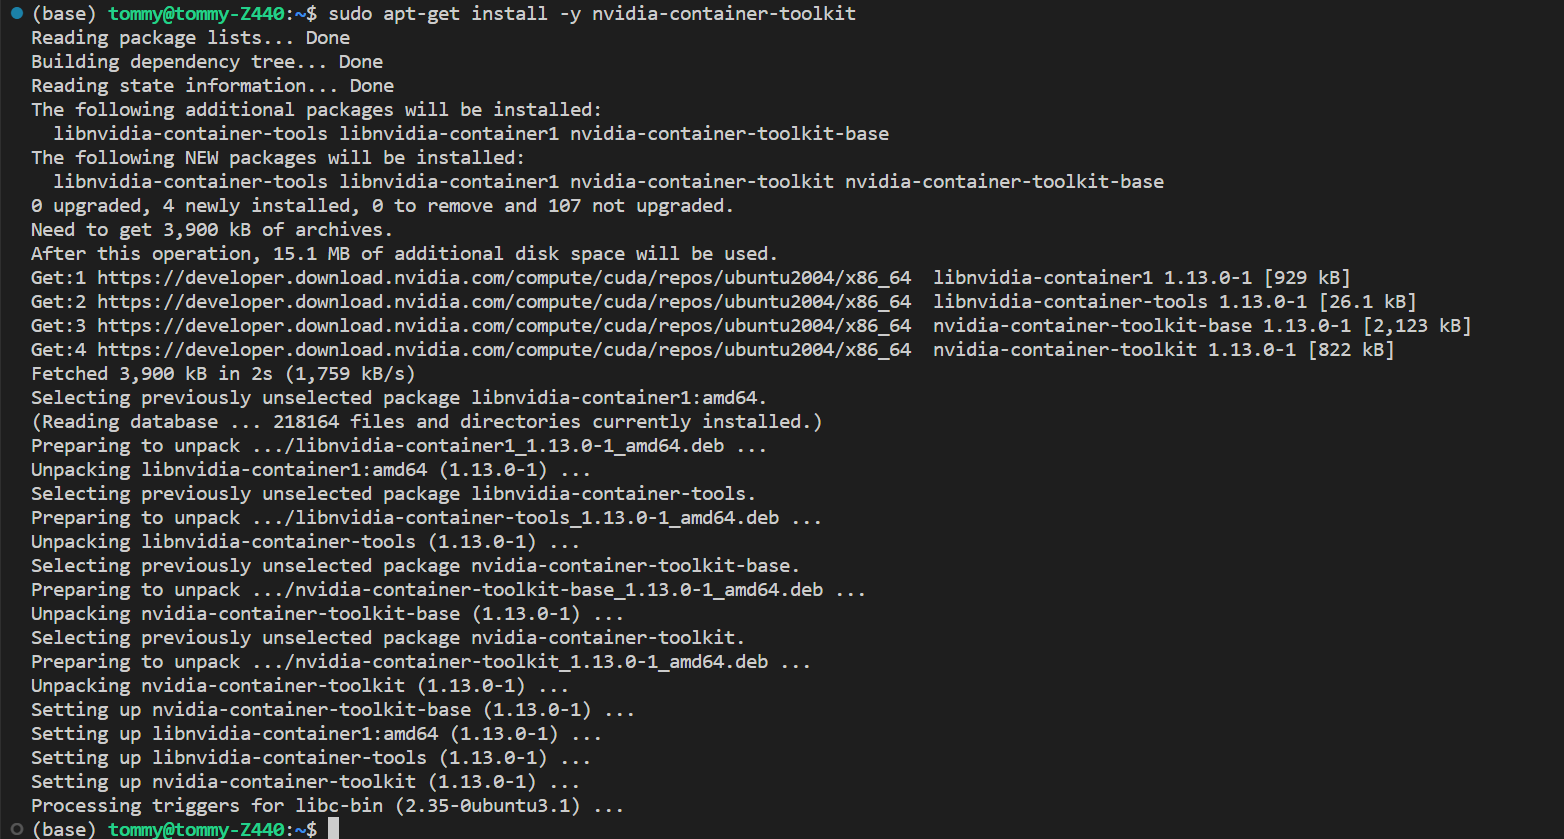

### C. Download pytorch image

`#$(pwd):/app 表示把当前host工作路径挂载到容器的/app目录下`  "(pwd)" is current working path

`#--name env_pyt_1.12 表示容器的名称是env_pyt_1`

#### `docker run --gpus all -it --name env_pyt_1.12 -v $(pwd):/app nvcr.io/nvidia/pytorch:22.03-py3 `

1. Download: https://catalog.ngc.nvidia.com/orgs/nvidia/containers/pytorch

nvcr.io/nvidia/pytorch:22.03-py3

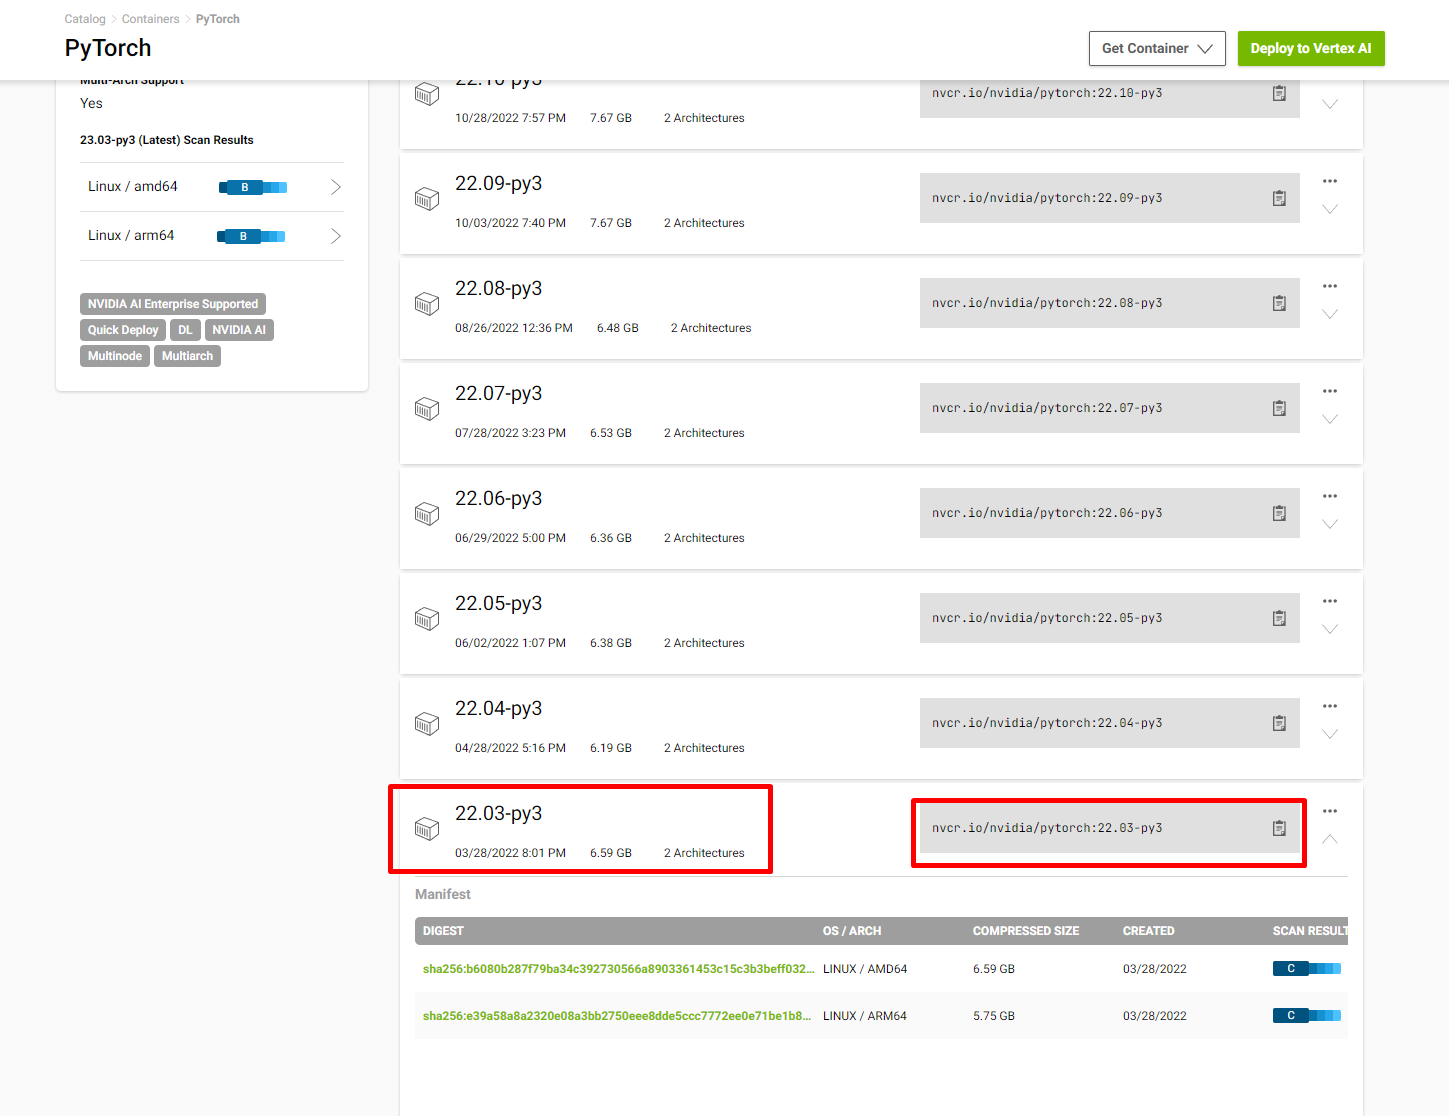



just run the command below, it will pull the image if there is no one in local

`sudo docker run --gpus all -it --name env_pyt_1.12 -v $(pwd):/app nvcr.io/nvidia/pytorch:22.03-py3`

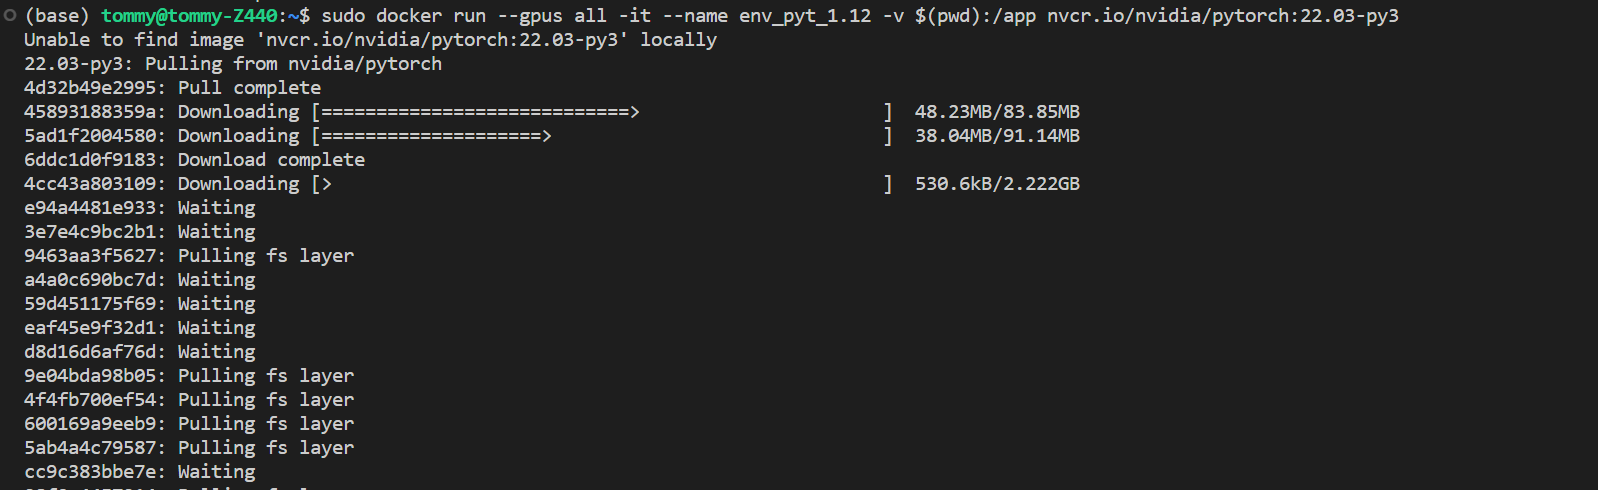

**Remove "--name env_pyt_1.12" if met error on run the image**

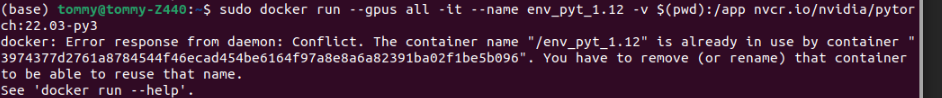

`sudo docker run --gpus all -it -v $(pwd):/app nvcr.io/nvidia/pytorch:22.03-py3`

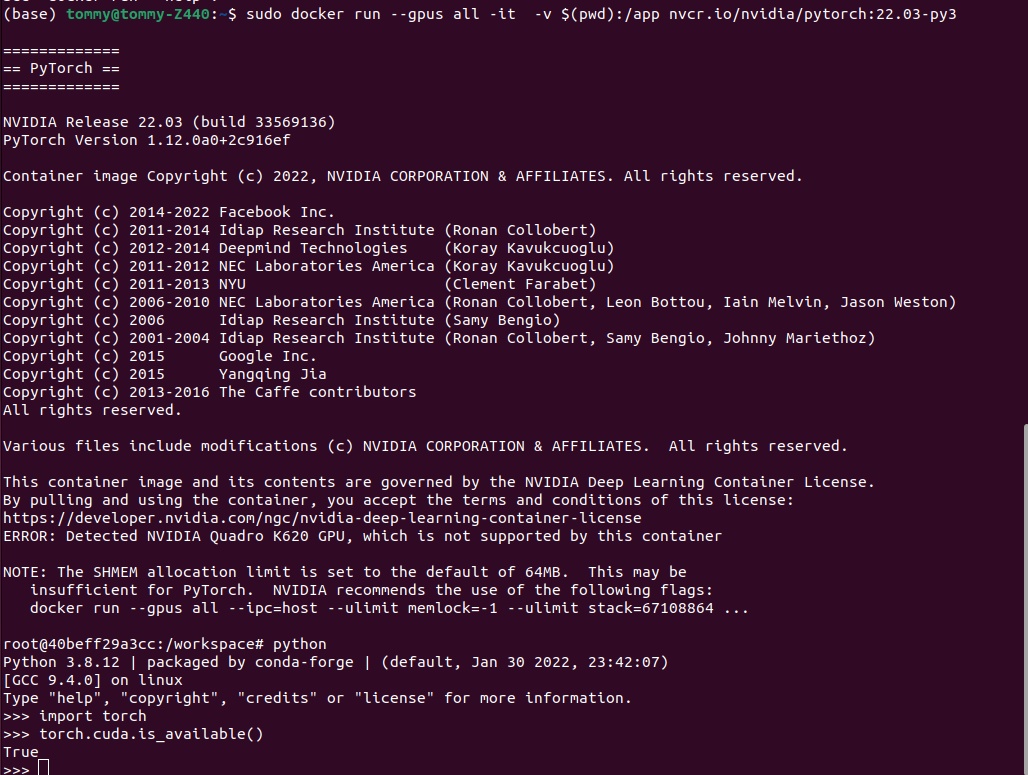

### D. Docker Commands
- Docker version: `sudo docker --version`
- Test: `sudo docker run hello-world`
- Docker status: `sudo systemctl status docker`
- Restarting the Docker Engine:  `sudo systemctl start docker`
- List Containers: `sudo docker ps`
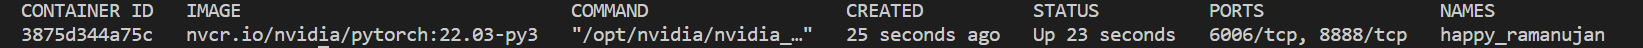

- List all containers, includes not started
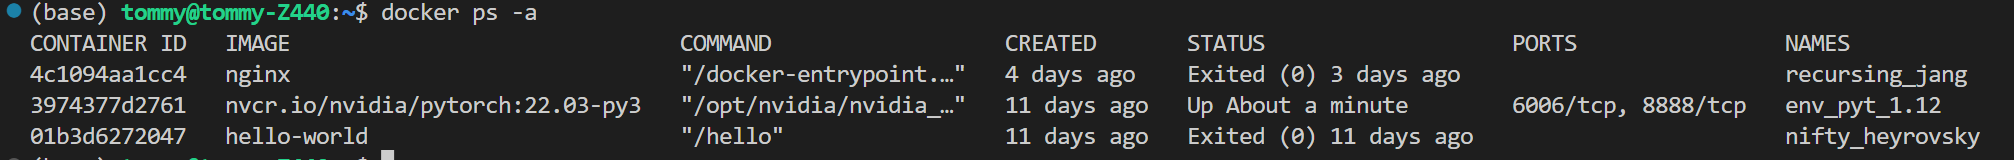

- Re-start container if it is exited
`docker start container-id`
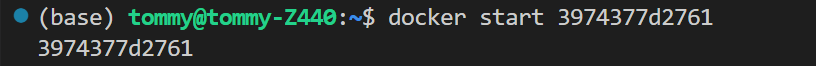

----------------------------------------------------------------
- docker pull: pull the images from Docker hub to local
- dockers run: create a container layer on top the image and start it
- docker save
- docker load


------------------------------------
<h2 style="background-color:blue;color:white"> Remove sudo in VSCode by adding user to docker group</h2>

- Create the docker group:  `sudo groupadd docker`
- Add your user to the docker group:  `sudo usermod -aG docker $USER`
- Log out and log back in so that your group membership is re-evaluated.
- You can also run the following command to activate the changes to groups: `newgrp docker`
- erify that you can run docker commands without sudo: `docker run hello-world`

### Start Docker image in VSCode
- in main vscode window, pick "VIew"-"Command Pallete"
- select "dev Container"
- enter password
- select the container available on Linux machine
- enter a new vscode window
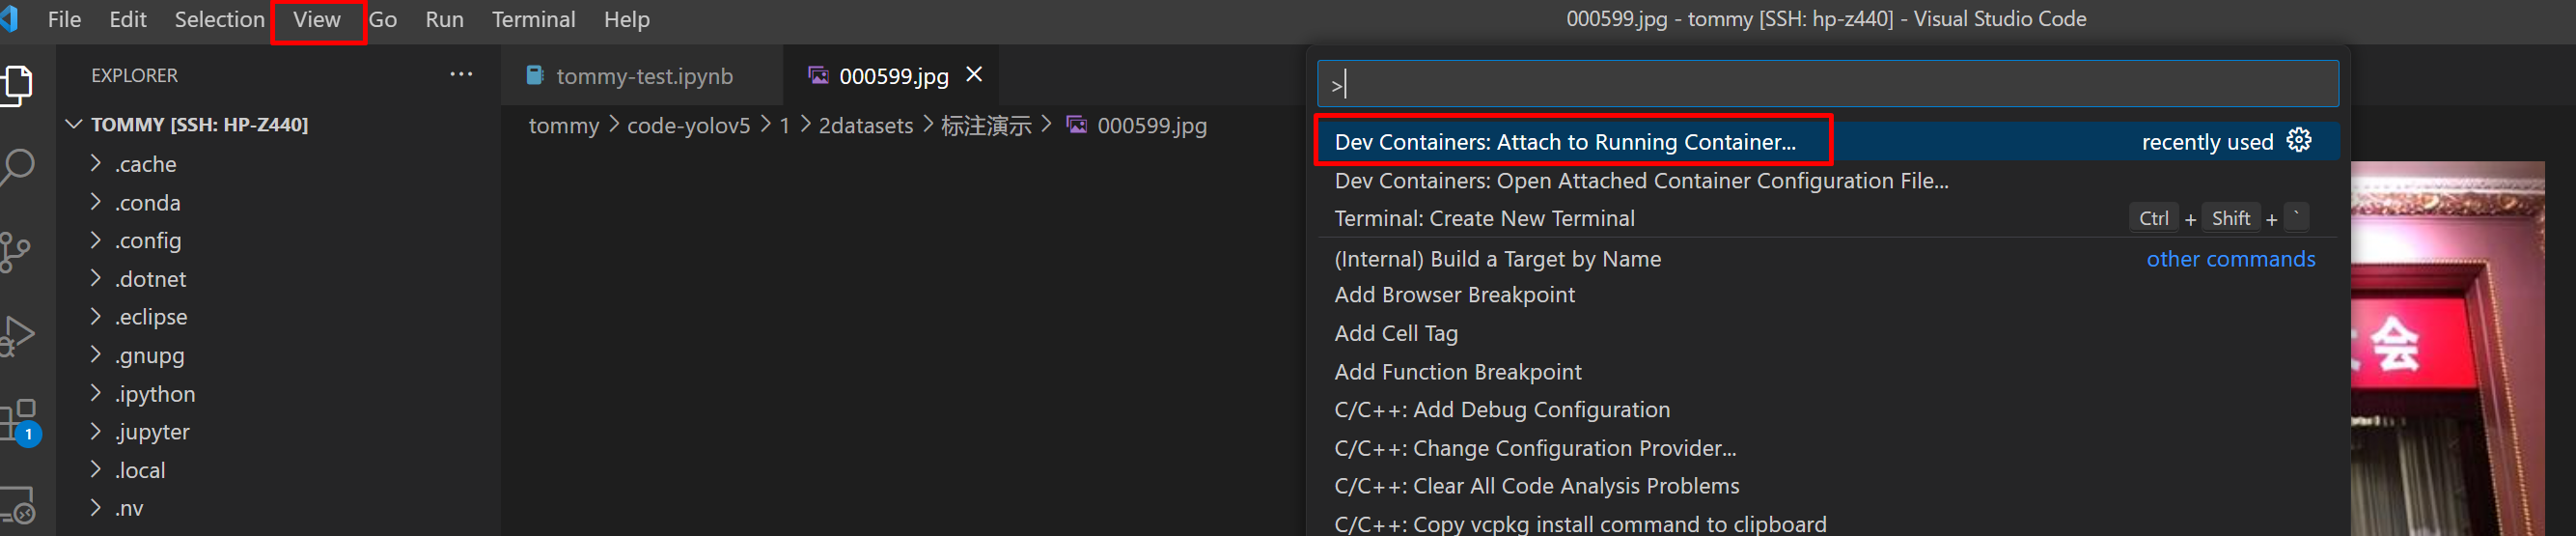

https://blog.csdn.net/P_LarT/article/details/107768318
#### 镜像用来创建容器,是容器的只读模板。

Fundamentally, a **container** is nothing but a running process, with some added encapsulation features applied to it in order to keep it isolated from the host and from other containers. 

One of the most important aspects of container isolation is that each container interacts with its own private filesystem; this filesystem is provided by a Docker image. An **image includes everything needed to run an application - the code or binary, runtimes, dependencies, and any other filesystem objects required.**

从根本上说，**容器**只不过是一个正在运行的进程，它还应用了一些附加的封装功能，以使其与主机和其他容器保持隔离。容器隔离的最重要方面之一是每个容器都与自己的私有文件系统进行交互；该文件系统由Docker镜像提供。**镜像包含运行应用程序所需的所有内容——代码或二进制文件、运行时、依赖项以及所需的任何其他文件系统对象。**

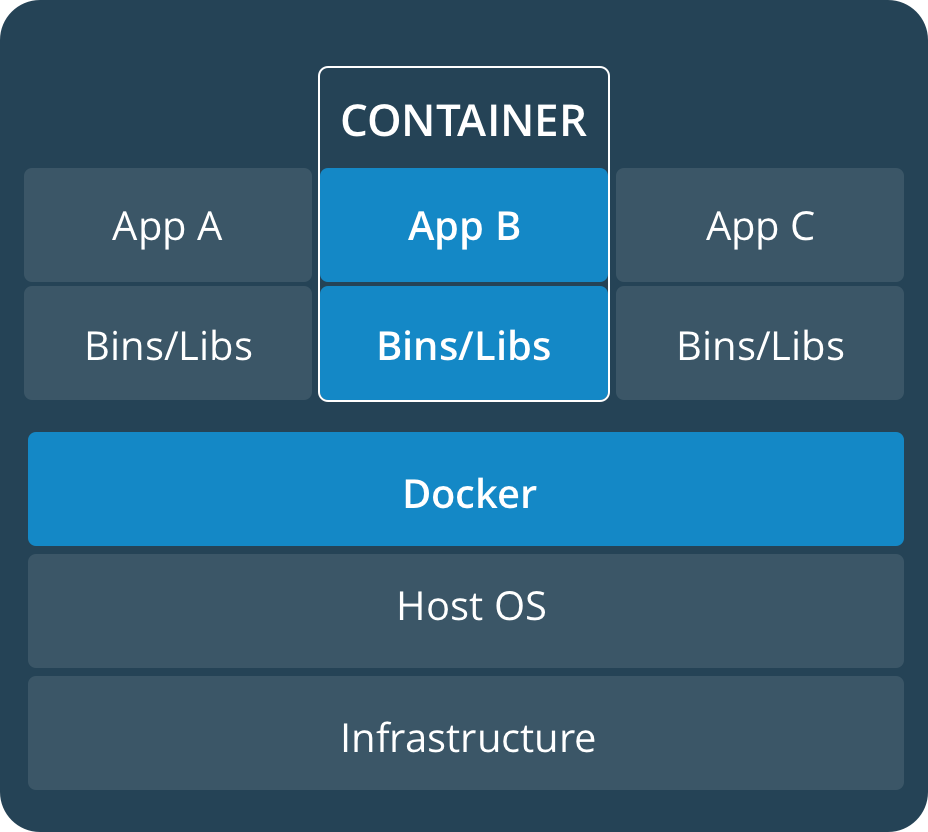

### E. Docker Plugin in VSCode

### F. Docker issue:
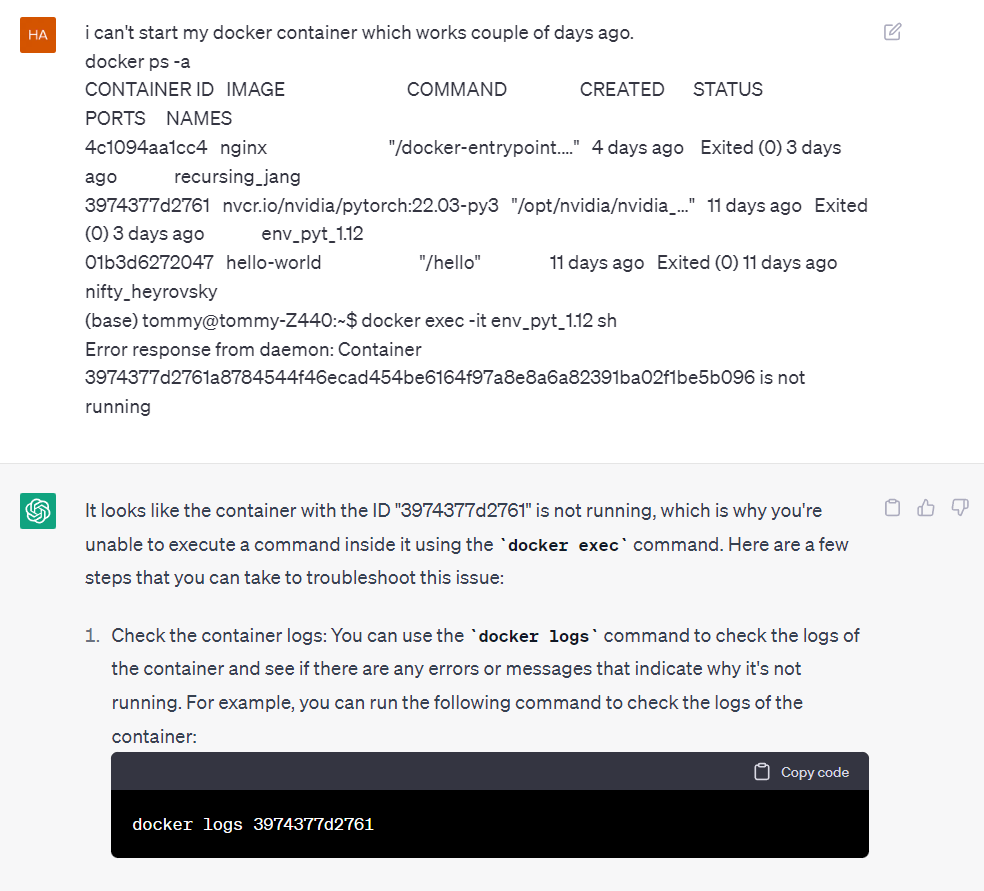
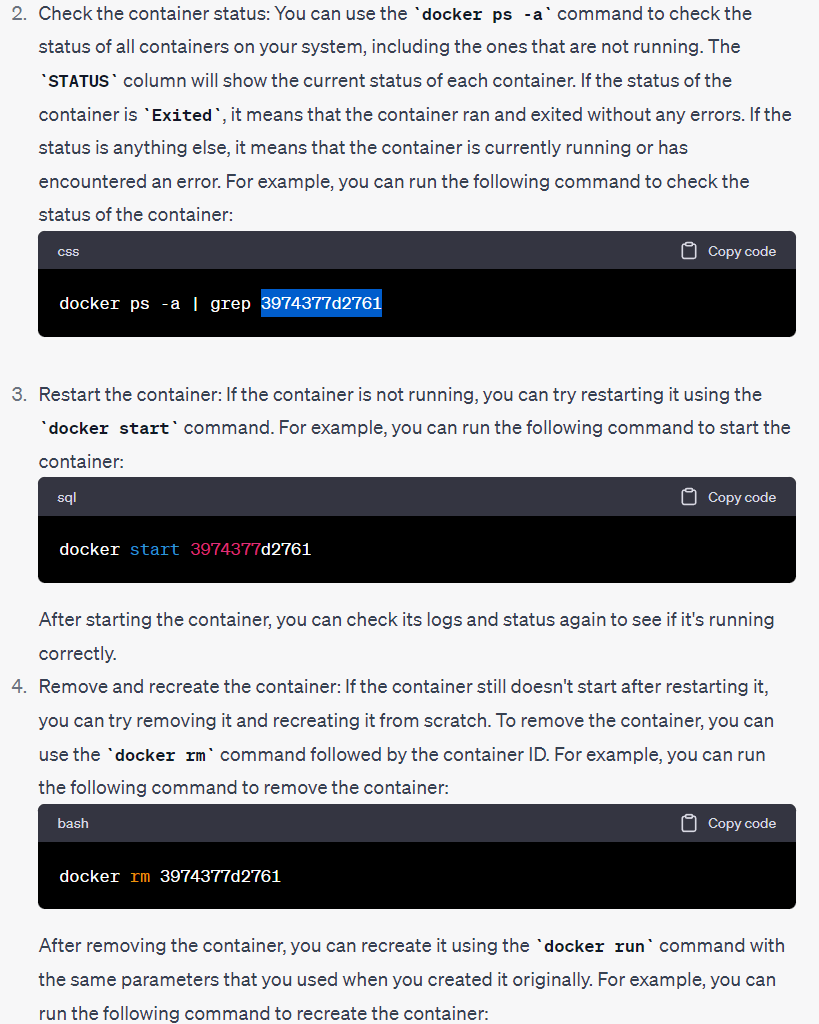
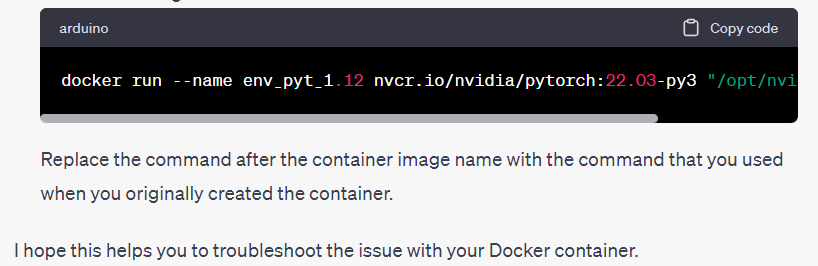

### Check GPUs in Docker
`nvcc -V` will return correct result, but doesn't mean GPUs are available. **nvidia-smi** is the best way to check. GPU is not available if the result table is not showing up

- the GPU may not work in VSCode app if you reloaded the host in another VSCode
    - Stop current docker container with `docker stop env_pyt_1.12`
    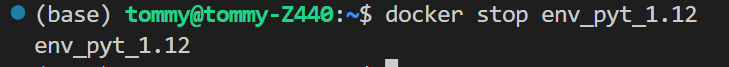
    
    - Start the docker container again `docker start env_pyt_1.12`
    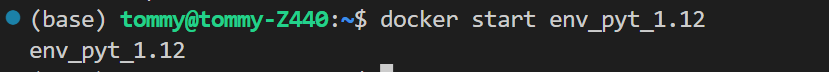
    
    - check the container in list
    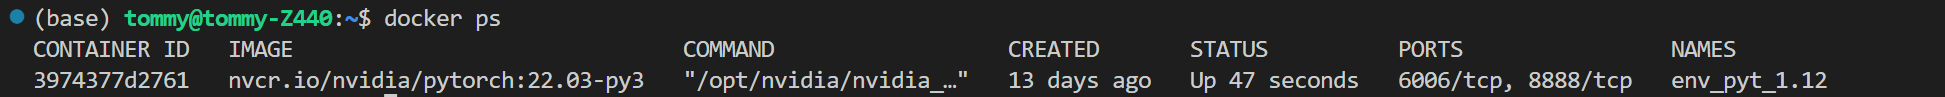

    - The new Docker App in VSCode should be started from the root VSCode windows, select "View"- "Command Pellete" - "attach docker container" - enter password - select the container in a list
    
    - python ./train.py --data ./data/coco_person.yaml --cfg ./models/yolov5s_person.yaml --weights ./weights/yolov5s.pt --batch-size 16 --epochs 60 --workers 0 --name s_60 --project yolo_person_s **--device 0**
#### "--device 0" must be added since there are multiple GPUs. there will be a multiple processing error if not one GPU is specified.

### check GPU Info
- `nvidia-smi`
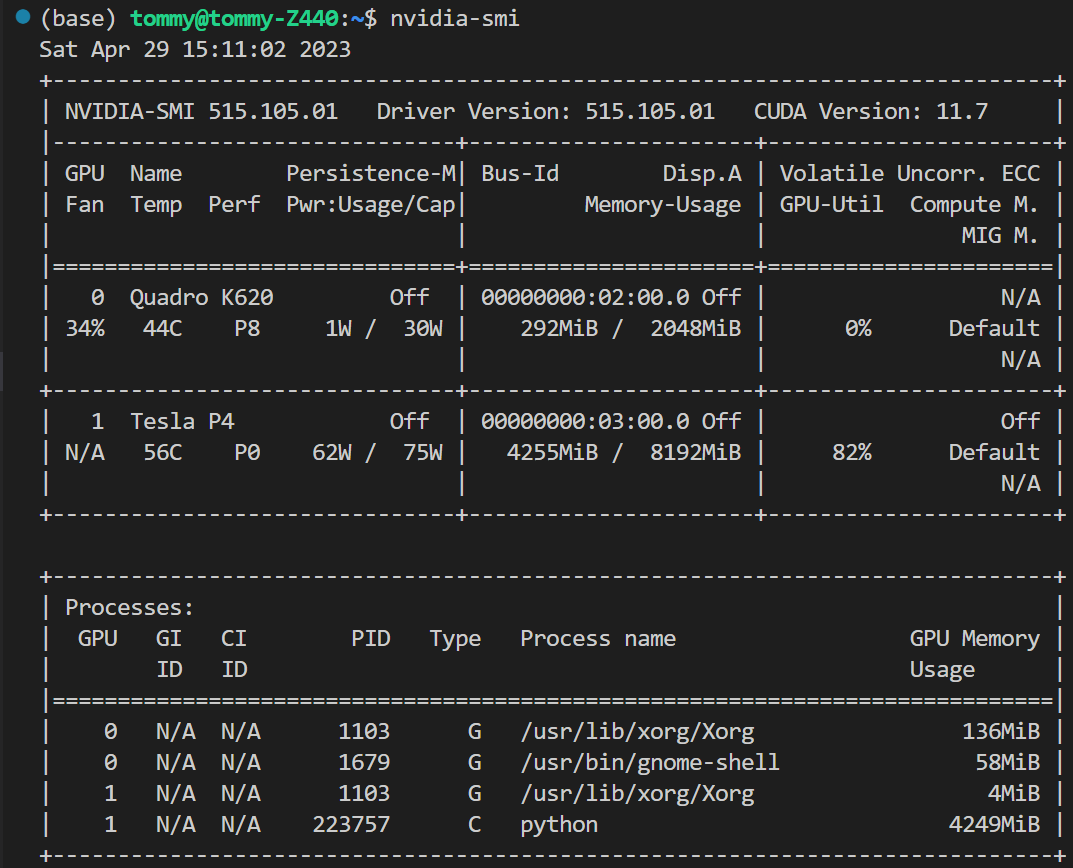

- lspci 

03:00.0 3D controller: NVIDIA Corporation GP104GL [Tesla P4] (rev a1)

### CPU Info
- **CPU Temperature**
    - `sudo apt install lm-sensors`
    - `sudo sensors-detect`
    - `sensors`
        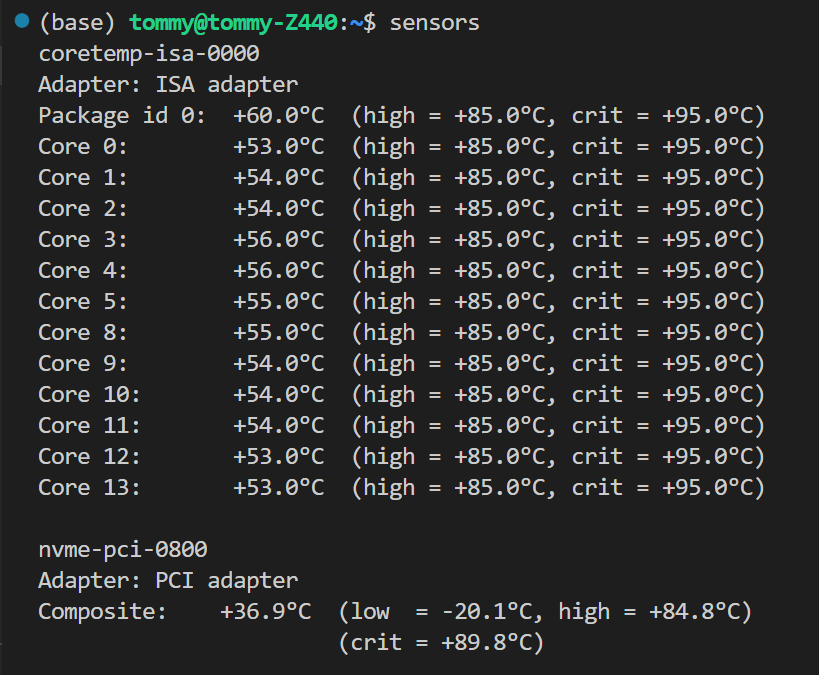
- **Real time CPU info**
    - `top`
    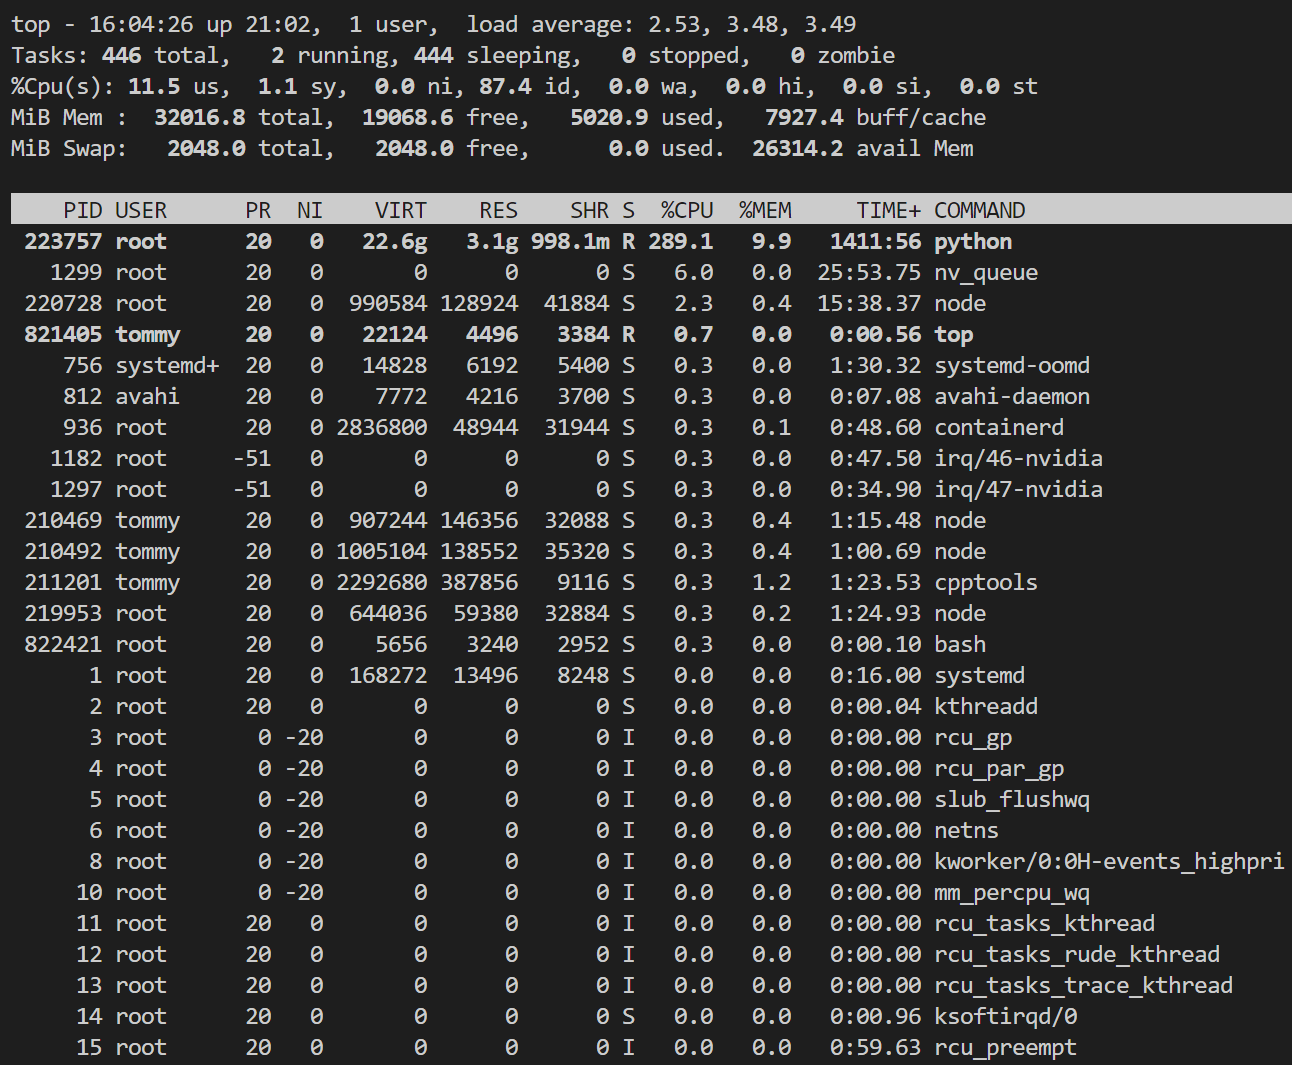
    - `top -i`
    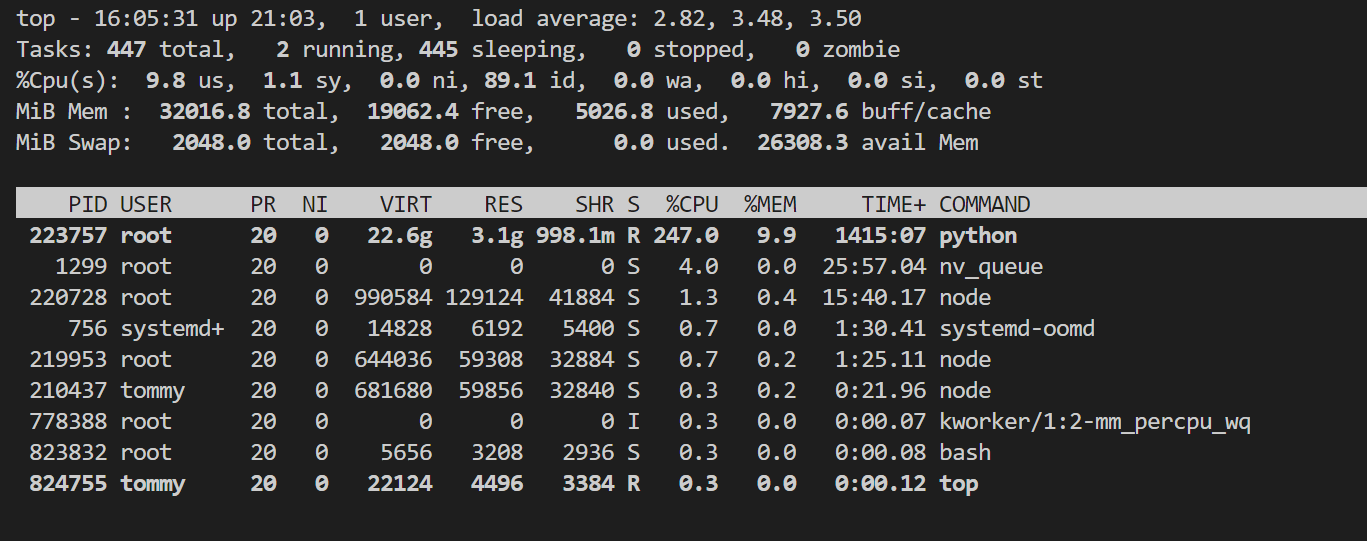

- **CPU Info**
    - `lscpu`
    - `cat /proc/cpuinfo` show each core

### Memory Info
- `free`
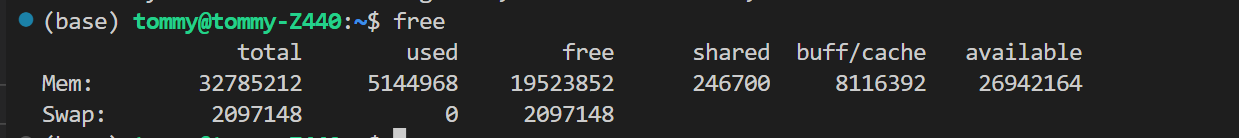